In [ ]:
pip install quandl

In [ ]:
pip install pandas

In [91]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import math, datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
style.use('ggplot')

# Simple Learning Regression Example


### The idea of regression is to take continous data and figure out the best fit line to that data and basically thats just boil down to modelling of data 

# Regression with Stock prices

In [3]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "J-uVJL6tyHsxHmZCbfb2"
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
# Deciding on the valuable data and Create of new Valuable data through Manipulation

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', ]]
df['HL_PCT'] = ((df['Adj. High'] - df['Adj. Low']) / df['Adj. Low']) * 100.0 # Creating New features
df['PCT_change'] = ((df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']) * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']] # Creating New dataframe
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [5]:
import math
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) #df.fillna method is use to replace the NAN with -99999 as ML cant take NAN

forecast_out = int(math.ceil(0.01*len(df))) # 0.01 is 1% of the entire length of the dataset

# Forecast out 1% of the entire datset
df['label'] = df[forecast_col].shift(-forecast_out) # Label of the dataset for prediction

df.dropna(inplace=True) # drop any still NaN information from the dataframe:
print(df.head())
print(forecast_out)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.078238
2004-08-20   54.322689  8.537313    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.966115    1.183658    9188600.0  71.219849
35


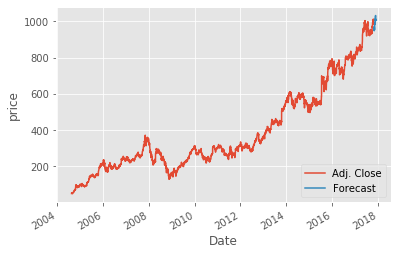

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.639972       NaN
2004-08-20   54.322689  8.537313    7.227007   22834300.0  69.078238       NaN
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  67.839414       NaN
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  68.912727       NaN
2004-08-25   53.164113  3.966115    1.183658    9188600.0  70.668146       NaN
                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2017-11-24 01:00:00         NaN     NaN         NaN          NaN    NaN   
2017-11-25 01:00:00         NaN     NaN         NaN          NaN    NaN   
2017-11-26 01:00:00         NaN     NaN         NaN          NaN    NaN   
2017-11-27 01:00:00         NaN     NaN         NaN          NaN    NaN 

In [9]:
# X will be features, here label column will be drop

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

#print(df.head())
#print(forecast_out)

#Converting of the dataset to numpy arrays for both features and labels using np.array method

X = np.array(df.drop(['label'], 1))  # X is consider as the fetures data: df.drop method drops the label col from the dataset
#X = X[:-forecast_out]
X = preprocessing.scale(X) #preprocessing the feature to be in range -1 to 1 to speed up processing and help with accuracy

X = X[:-forecast_out]
X_lately = X[-forecast_out:]


df.dropna(inplace=True)


# X = X[:-forecast_out+1] #redifining X

y = np.array(df['label']) # y is consider as the label of the dataset

# Training and Testing features and labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Defining Classifier
clf = svm.SVR(kernel='poly') # Using the Support Vector Regression Classifier

#For loops for using different kind of Svr parameter for accuracy
# for k in ['linear','poly','rbf','sigmoid']:
#     clf = svm.SVR(kernel=k)
#     clf.fit(X_train, y_train)
#     confidence = clf.score(X_test, y_test)
#     print(k,confidence)


clf = LinearRegression() # Another type of classifier 'LinearRegression' from Sklearn

# After we defined the classifer, we're ready to train it. With Scikit-Learn (sklearn), you train with .fit:

clf.fit(X_train, y_train) # Fitiing our training features and labels

#Pickling 
# the reason why you pickle is the margin
#the purpose of saving a classifier is to avoid doing the training step

#To dump the classifier
# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf, f) #dumping a classfier clf to f directory
    
# To use the classifier
# pickle_in = open('linearregression.pickle', 'rb') 
# clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)


# The forecast_set is an array of forecasts, showing that not only could you just seek out a single prediction, 
# but you can seek out many at once. 
forecast_set = clf.predict(X_lately) # Predicting against X_lately

#print(forecast_set, accuracy, forecast_out)

#  adding a new column to our dataframe, the forecast column:
df['Forecast'] = np.nan #this specify that the entire column is full of not a number value

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

#We need to populate the dataframe with the new date and the forecast value using for loop

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix) #Reading through the forecast set and day and setting those as d values in dataframe basically making d feature feature is nan 
    next_unix += one_day
    #.loc reference the index for the dataframe
    # next_date is the datestamp and the index of the dataframe
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] # takes all d first column set them to nan

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

print(df.head())
print(df.tail())

#print(forecast_out)

#print(accuracy)

#print(len(X), len(y))


# Pickling, Scaling and little networku

### pickling really dosent have anything to do with regression just simple a kind of disposal to save yourself alot of time 

#### Pickling is a series __ of any  python object this could be a dictionary, classifier

In [10]:
#Pickling 
# the reason why you pickle is the margin
#the purpose of saving a classifier is to avoid doing the training step

#To dump the classifier
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f) #dumping a classfier clf to f directory
    
# To use the classifier
pickle_in = open('linearregression.pickle', 'rb') 
clf = pickle.load(pickle_in)

In [11]:
from sklearn.neighbors import kNeighborsClassifier

ImportError: cannot import name 'kNeighborsClassifier' from 'sklearn.neighbors' (/home/themysteriouschemeng/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/__init__.py)

# 8th Part of ML

In [13]:
from statistics import mean

In [14]:
xs = [1, 2, 3, 4, 5]
ys = [5, 4, 6, 5, 6]

In [15]:
#Converting list to np array using np.array so we can perform matrix

xs = np.array([1, 2, 3, 4, 5], dtype=np.float64)
ys = np.array([5, 4, 6, 5, 6], dtype=np.float64)

In [19]:

# Finding the slope (m)

# If graph our data should like 
def best_fit_slope(xs, ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs, ys)
print(m)

0.29999999999999893


# 9th Part

In [5]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5, 4, 6, 5,6, 7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = ( ( (mean(xs)*mean(ys))- mean(xs*ys) ) /
         ((mean(xs)*mean(xs)) - mean(xs*xs) ))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

# Calculating Squared error

def square_error(ys_orig, ys_line):
    return sum((ys_line - y_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean )
    
# Check more on using this function
m, b = best_fit_slope_and_intercept(xs,ys)


# Creating lines that fit the table 
# we could make a fnx for this or just knock it out in a single 1 linear loop

 # linear_regression = [(m * x) + b for x in xs]

regression_line = []

for  x in xs:
    regression_line.append((m *x) + b)

print(regression_line)

print(m, b)


r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)


# plotting

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()


# Making predictions using the models we've just created

predict_x = 7

# We have our input data, our "feature" so to speak. What's the label? 

predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

[4.428571428571429, 4.857142857142858, 5.2857142857142865, 5.714285714285714, 6.142857142857143, 6.571428571428572]
0.42857142857142866 4.0


NameError: name 'squared_error' is not defined

In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

# b = squared_error(ys_orig,ys_line)
# print(b)
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)


0.3214285714285714


## PART 12

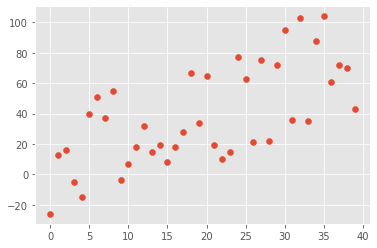

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt



def create_dataset(hm, variance, step=2, correlation=False):
# hm; the value will be "how much" this is how many dataponts that we want in the set.
# variance: this will dictate how much each point vary from previous point. the more variance the less-tight the data will be

# Step: this will be how far to step onn average per point defaulting to 2.

# correlation: This will be either false, pos, or neg to indicatte that we want no correlation, positive correlation, or negative correlation
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
        
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 40, 2, correlation='pos')


plt.scatter(xs, ys)
#plt.plot(xs, regression_line)
plt.show()